# Pencarian dan Penambangan Web - Tugas 1 : Crawling Berita Online

Dalam Tugas 1 diminta untuk melakukan proses crawling website berita online. Saya disini menggunakan website https://www.kompas.com/ sebagai bahan untuk tugas ini.

Dibuat Oleh:

*   Nama : Sabil Ahmad Hidayat
*   NIM : 220411100058
*   Kelas : PPW A

Link Projek : https://github.com/meinhere/paw



# Crawling Website Berita Online (Kompas)

## Apa itu Web Crawling?

Web Crawling atau bisa disebut juga Web Spider adalah bot yang otomatis merayapi data melalui tautan. Web Crawling biasanya dioperasikan oleh search engine yang bertugas untuk mencari dan menemukan isi konten atau sesuatu yang ada pada sebuah halaman website.

Web Crawling bekerja dengan mempelajari setiap halaman web, tentang apa halaman tersebut, mendapatkan beberapa metadata (judul, deskripsi, status, dll.) kata kunci sehingga mendapatkan informasi yang dibutuhkan.

Web Crawling digunakan untuk mengekstrak dan menangkap data dari halaman web yang dirayapi kemudian dianalisis untuk mendapatkan informasi.


## Bagaimana Web Crawling Bekerja?

Web Crawling melakukan tugasnya melalui tautan dan melacaknya. Pada dasarnya, susah untuk merayapi banyak halaman sekaligus dalam suatu tautan sehingga perlu menerapkan aturan dan prioritas yang wajib diikuti sesuai dengan syarat yang ada (kepentingan, jumlah kunjungan, jenis konten, profil pengguna, dll).

Setelah halaman berhasil dimuat, teks dalam halaman web dimasukkan ke dalam indeks search engine.

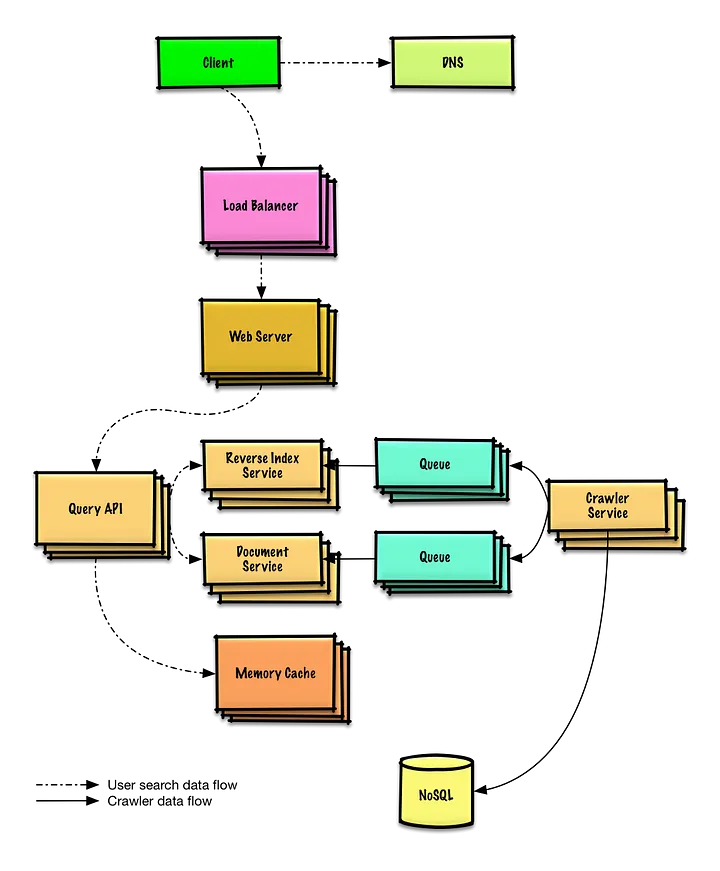

# Proses Crawling Website

# Persiapan Library

In [1]:
# alat untuk crawling
from urllib.request import urlopen
from bs4 import BeautifulSoup

# dataframe
import pandas as pd

# monitoring
from tqdm import tqdm

**urlopen** berfungsi sebagai http client untuk menangkap dan memproses url

**BeautifulSoup** berfungsi untuk mengambil dan memetakan data (parse) dari HTML/XML

**pandas** berfungsi untuk memproses data ke dalam dataframe

**tqdm** berfungsi untuk melakukan tracking terhadap proses pengambilan setiap berita

## Membuat Fungsi untuk Persiapan Crawling

In [54]:
# fungsi untuk mengambil link yang akan dilakukan crawling
def extract_urls(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    urls = soup.find_all("a", {"class": "paging__link"})
    urls = [url.get('href') for url in urls]

    return urls

# fungsi untuk mengambil isi dari berita
def get_content(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    div = soup.find("div", {"class": "read__content"})
    paragraf = div.find_all("p")

    content = ''
    for p in paragraf:
        content += p.text

    return content

function **extract_urls** digunakan untuk melakukan ekstraksi link url yang memiliki pagination pada halaman awal, sehingga didapat beberapa url yang bisa mengarah ke halaman selanjutnya atau sebelumnya.

function **get_content** digunakan untuk melakukan proses pembuatan isi berita sesuai link berita yang dicari.

## Crawling Data

Pada tahap ini dilakukan proses crawling data terhadap berita dari url yang akan dicari. Dibutuhkan beberapa variabel yang perlu disiapkan

*   **news** digunakan untuk menyimpan data berita hasil crawling
*   **link** digunakan untuk menentukan url website yang akan dicari
*   **page** digunakan untuk menentukan jumlah halaman yang akan dicari
*   **news_per_page** digunakan untuk menentukan jumlah berita per halaman
*   **urls** digunakan untuk menampung beberapa link yang akan dilakukan proses crawling



In [55]:
# inisialisasi variabel penampung hasil berita
news_data = []

# inisialisasi persiapan untuk crawling berita
link = "https://indeks.kompas.com"
# last_url = extract_urls(link).pop()
# page = last_url.split('=').pop() # jumlah halaman secara otomatis
page = 1 # jumlah halaman secara manual

# persiapan link yang akan dilakukan crawling
urls = [link + '/?page=' + str(a) for a in range(1, int(page) + 1)]

# menelusuri semua link yang telah ditentukan
for idx, url in enumerate(urls):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    # mengambil data yang diperlukan pada struktur html
    links       = soup.find_all("a", {"class": "article-link"})
    titles      = soup.find_all("h2", {"class": "articleTitle"})
    dates       = soup.find_all("div", {"class": "articlePost-date"})
    categories  = soup.find_all("div", {"class": "articlePost-subtitle"})

    news_per_page = len(links) # berita artikel yang ditampilkan

    # memasukkan data ke dalam list
    for elem in tqdm(range(news_per_page)):
      news = {}
      news['No']               = news_per_page * idx + (elem + 1)
      news['Judul Berita']     = titles[elem].text
      news['Isi Berita']       = get_content(links[elem].get("href"))
      news['Tanggal Berita']   = dates[elem].text
      news['Kategori Berita']  = categories[elem].text

      news_data.append(news)

100%|██████████| 15/15 [00:09<00:00,  1.62it/s]


Dari proses yang dilakukan diatas, didapatkan data berita yang ada di variabel **news_data** sesuai dengan jumlah halaman dan berita per halaman yang dicari

## Konversi ke dalam Data Frame

Selanjutnya pada tahap ini, dilakukan proses konversi data yang ada ke dalam dataframe agar dapat dilihat dalam bentuk tabel dan dimanipulasi sesuai keinginan.

In [56]:
main_df = pd.DataFrame(news_data).set_index('No')
main_df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
No,,,,
1,Kaesang Hanya Tebar Senyum Saat Ditanya Dugaan...,"JAKARTA, KOMPAS.com - Ketua Umum (Ketum) Parta...",05/09/2024,NEWS
2,Saat Jokowi Langsung Gunakan Innova Zenix usai...,"JAKARTA, KOMPAS.com - Mobil Innova Zenix menja...",05/09/2024,NEWS
3,6 Benda yang Bisa Dibersihkan dengan Sampo Bayi,"KOMPAS.com - Sampo bayi, dengan formulanya ya...",05/09/2024,HOMEY
4,"Kunjungi Makam Bung Karno dan Tokoh Ulama, Ris...",KOMPAS.com - Pasangan calon (paslon) Gubernur ...,05/09/2024,NEWS
5,"Spesifikasi Maung MV3 Pope, Mobil Buatan PT Pi...",KOMPAS.com - Pemimpin tertinggi Gereja Katolik...,05/09/2024,TREN
6,"Peringati Hari Pelanggan Nasional, Saloka Beri...","UNGARAN, KOMPAS.com - Saloka Theme Park, Kabup...",05/09/2024,TRAVEL
7,"Catat, Ini Daftar Rute TransJakarta ke Lokasi ...","JAKARTA, KOMPAS.com - Misa Agung bersama Pemim...",05/09/2024,OTOMOTIF
8,"Cari Momentum Pertumbuhan, Wall Street Tumbuh ...","JAKARTA, KOMPAS.com - Harga saham berjangka se...",05/09/2024,MONEY
9,"Percikan Kecil Berujung Petaka di Bekasi, Warg...","JAKARTA, KOMPAS.com - Kebakaran menghanguskan ...",05/09/2024,NEWS
